# Logistic Regression

* The first classifier we will discuss in this class is  **Logistic Regression**. 

* In Linear Regression, we fit a line to data. 

* In a simple (two-class) Logistic Regression we will fit a curve to the probability that the data comes from one **class**

* Many AI models are complicated versions of logistic regression models. 


<p align="center">
  <img src="Exam_pass_logistic_curve.svg.png" alt="alt text" width="50%">
</p>


### Logistic Function 

Logistic Regression addresses the problem of estimating a probability model, $𝑃(Y = 1|x)$. 

The logistic regression model uses a function for the probability model, called the logistic function:

$$ P(Y = 1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$$





In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

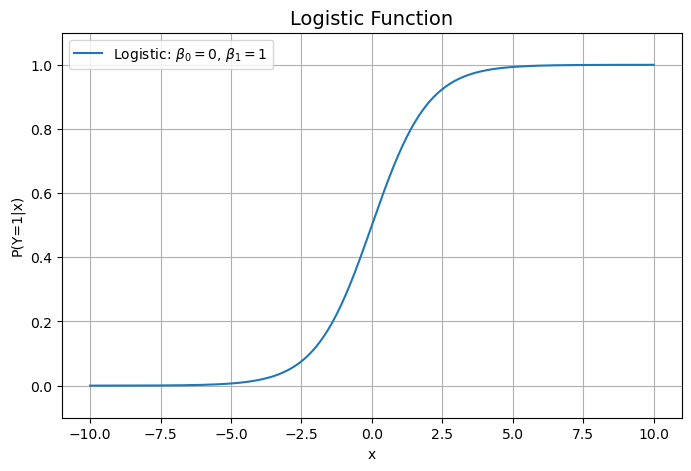

In [2]:


def logistic(x, beta0=0, beta1=1):
    p =  1 / (1 + np.exp(-(beta0 + beta1 * x)))
    return p

# Generate a range of x values
x = np.linspace(-10, 10, 400)

# Parameters
beta0 = 0   # Intercept
beta1 = 1   # Slope

# Compute logistic values
y = logistic(x, beta0, beta1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=fr'Logistic: $\beta_0={beta0}$, $\beta_1={beta1}$')
plt.title("Logistic Function", fontsize=14)
plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()


The probability model will predict $𝑃(Y = 1 | x)$ with an S-shaped curve:

* $\beta_0$ shifts the curve right or left by $c = \frac{-\beta_0}{\beta_1}$
* $\beta_1$ controls the steepness the S-shaped curve. Distance from $\frac{1}{2}$ to almost 1 or $\frac{1}{2}$  to
almost 0 to $\frac{1}{2}$  is $\frac{2}{\beta_1}$
* if $\beta_1$ is positive, then the predicted $P(Y = 1|x)$ goes from zero for small values
of $x$ to one for large values of $X$
* if $\beta_1$ is negative, then the predicted $P(Y = 1|x)$ goes from one for small values
of $x$ to zero for large values of $X$


<p align="center">
  <img src="/home/ramesh/Teaching/COGS105/Lectures/Week_4/logistic.png" alt="alt text" width="50%">
</p>

* It's useful to rewrite the logistic regression model, in terms of odds.  This is called the **logit** function by statisticians and in economics


$$ \text{logit}\big(P(Y = 1 \mid x)\big) = \ln\left( \frac{P(Y = 1 \mid x)}{1 - P(Y = 1 \mid x)} \right) = \beta_0 + \beta_1 x $$

* The ratio shown is the **odds** ratio between the probability of $Y = 1$ with the probability $Y = 0$, where $Y$ can only be 1 or 0  

* A one unit change in x is associated with an $e^{\beta_1}$ change in the odds that $𝑌 = 1$ .

* What happens with the odds ratio is 1, i.e., $P(Y = 1) = 0.5?$

* Since $P(Y = 0) = 1 - P(Y = 1) = 0.5$, 

$$ \ln\left( \frac{P(Y = 1)}{1 - P(Y = 1)} \right) = ln (1) = 0  = \beta_0 + \beta_1 x $$

$$ x = -\frac{\beta_0}{\beta_1} $$


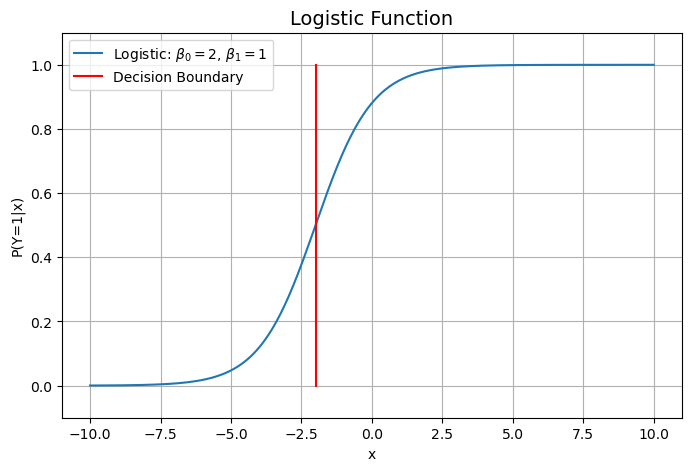

In [3]:

# Generate a range of x values
x = np.linspace(-10, 10, 400)

# Parameters
beta0 = 2   # Intercept
beta1 = 1   # Slope
c = -beta0 / beta1  # x value where P(Y=1|x) = 0.5  
# Compute logistic values
y = logistic(x, beta0, beta1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=fr'Logistic: $\beta_0={beta0}$, $\beta_1={beta1}$')
plt.plot([c,c], [0 ,1], 'r-',label = 'Decision Boundary')  # Point where P(Y=1|x) = 0.5
plt.title("Logistic Function", fontsize=14)
plt.xlabel("x")
plt.ylabel("P(Y=1|x)")
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()


### Probability mass function for logistic regression 

* In logistic regression, the response variable $Y$ is binary, taking values in

$$ Y \in \{0, 1\} $$


* We define

$$     P(Y = 1 \mid x) = p \quad \text{and} \quad P(Y = 0 \mid x) = 1 - p $$


* $p$ is modeled using the logistic function:

$$ p = \frac{1}{1 + e^{- (\beta_0 + \beta_1 x)}} $$


* The probability mass function (PMF) of a Bernoulli random variable can be written compactly as

$$P(Y = y \mid x) = p^{\,y} (1 - p)^{\,1 - y}, \quad \text{for } y \in \{0,1\} $$


* This expression encodes both possible outcomes in a single formula. Specifically:
    * If $y = 1$
    $$ P(Y = 1 \mid x) = p^1 (1 - p)^0 = p $$
    * If $y = 0$
    $$ P(Y = 0 \mid x) = p^0 (1 - p)^1 = 1 - p $$


* The notation $P(Y = y)$ means *the probability that the random variable $Y$ takes the specific observed value $y$*. Since $y$ can only be $0$ or $1$, this single expression

$$ P(Y = y) = p^{\,y}(1-p)^{\,1-y} $$

automatically selects the correct probability term depending on whether the observed outcome was $0$ or $1$.


### Likelihood for Logistic Regression

* Given a dataset $\{(x_i, y_i)\}_{i=1}^N$ with $y_i \in \{0,1\}$ and

$$ p_i = P(Y_i = 1 \mid x_i) = \sigma(\beta_0 + \beta_1 x_i) = \frac{1}{1 + e^{- (\beta_0 + \beta_1 x_i)}} $$

* the Likelihood of the parameter vector $\beta = (\beta_0, \beta_1)$ is

$$    L(\beta \mid x_{1:N}, y_{1:N}) = \prod_{i=1}^N p_i^{\,y_i} (1 - p_i)^{\,1 - y_i} $$

* Taking the logarithm yields the log-likelihood:

$$ \ell(\beta) = \ln L(\beta) = \sum_{i=1}^N \left[ y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i) \right] $$


### Loss Function 

* In machine learning, the term loss function is used to refer to some measure of error that you are trying to minimize.  If you have a probability model, as in Logistic Regression,  the loss function is simply the **negative log-Likelihood** 

$$ -\ell(\beta) = -\ln L(\beta) = -\sum_{i=1}^N \left[ y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i) \right] $$

* As mentioned in the video lecture, in machine learning this is called negative cross-entropy.  
* How do we minimize this? Differentiate, equate to zero and solve for it!
* Or, stick into some numerical procedure (gradient descent usually) to find the minimum  


### An example of real data:  

## Diabetes Prediction Example 
[Pima Indians Diabetes Study](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [4]:

#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv")

In [5]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#I grabbed a list of all the columns 
cols = pima.columns

In [8]:
#Examine how many of each outcome
pima["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

* I always like to take a first glance at all the data.  This works for continuous valued data, and works if you have fewer than 10 variables.

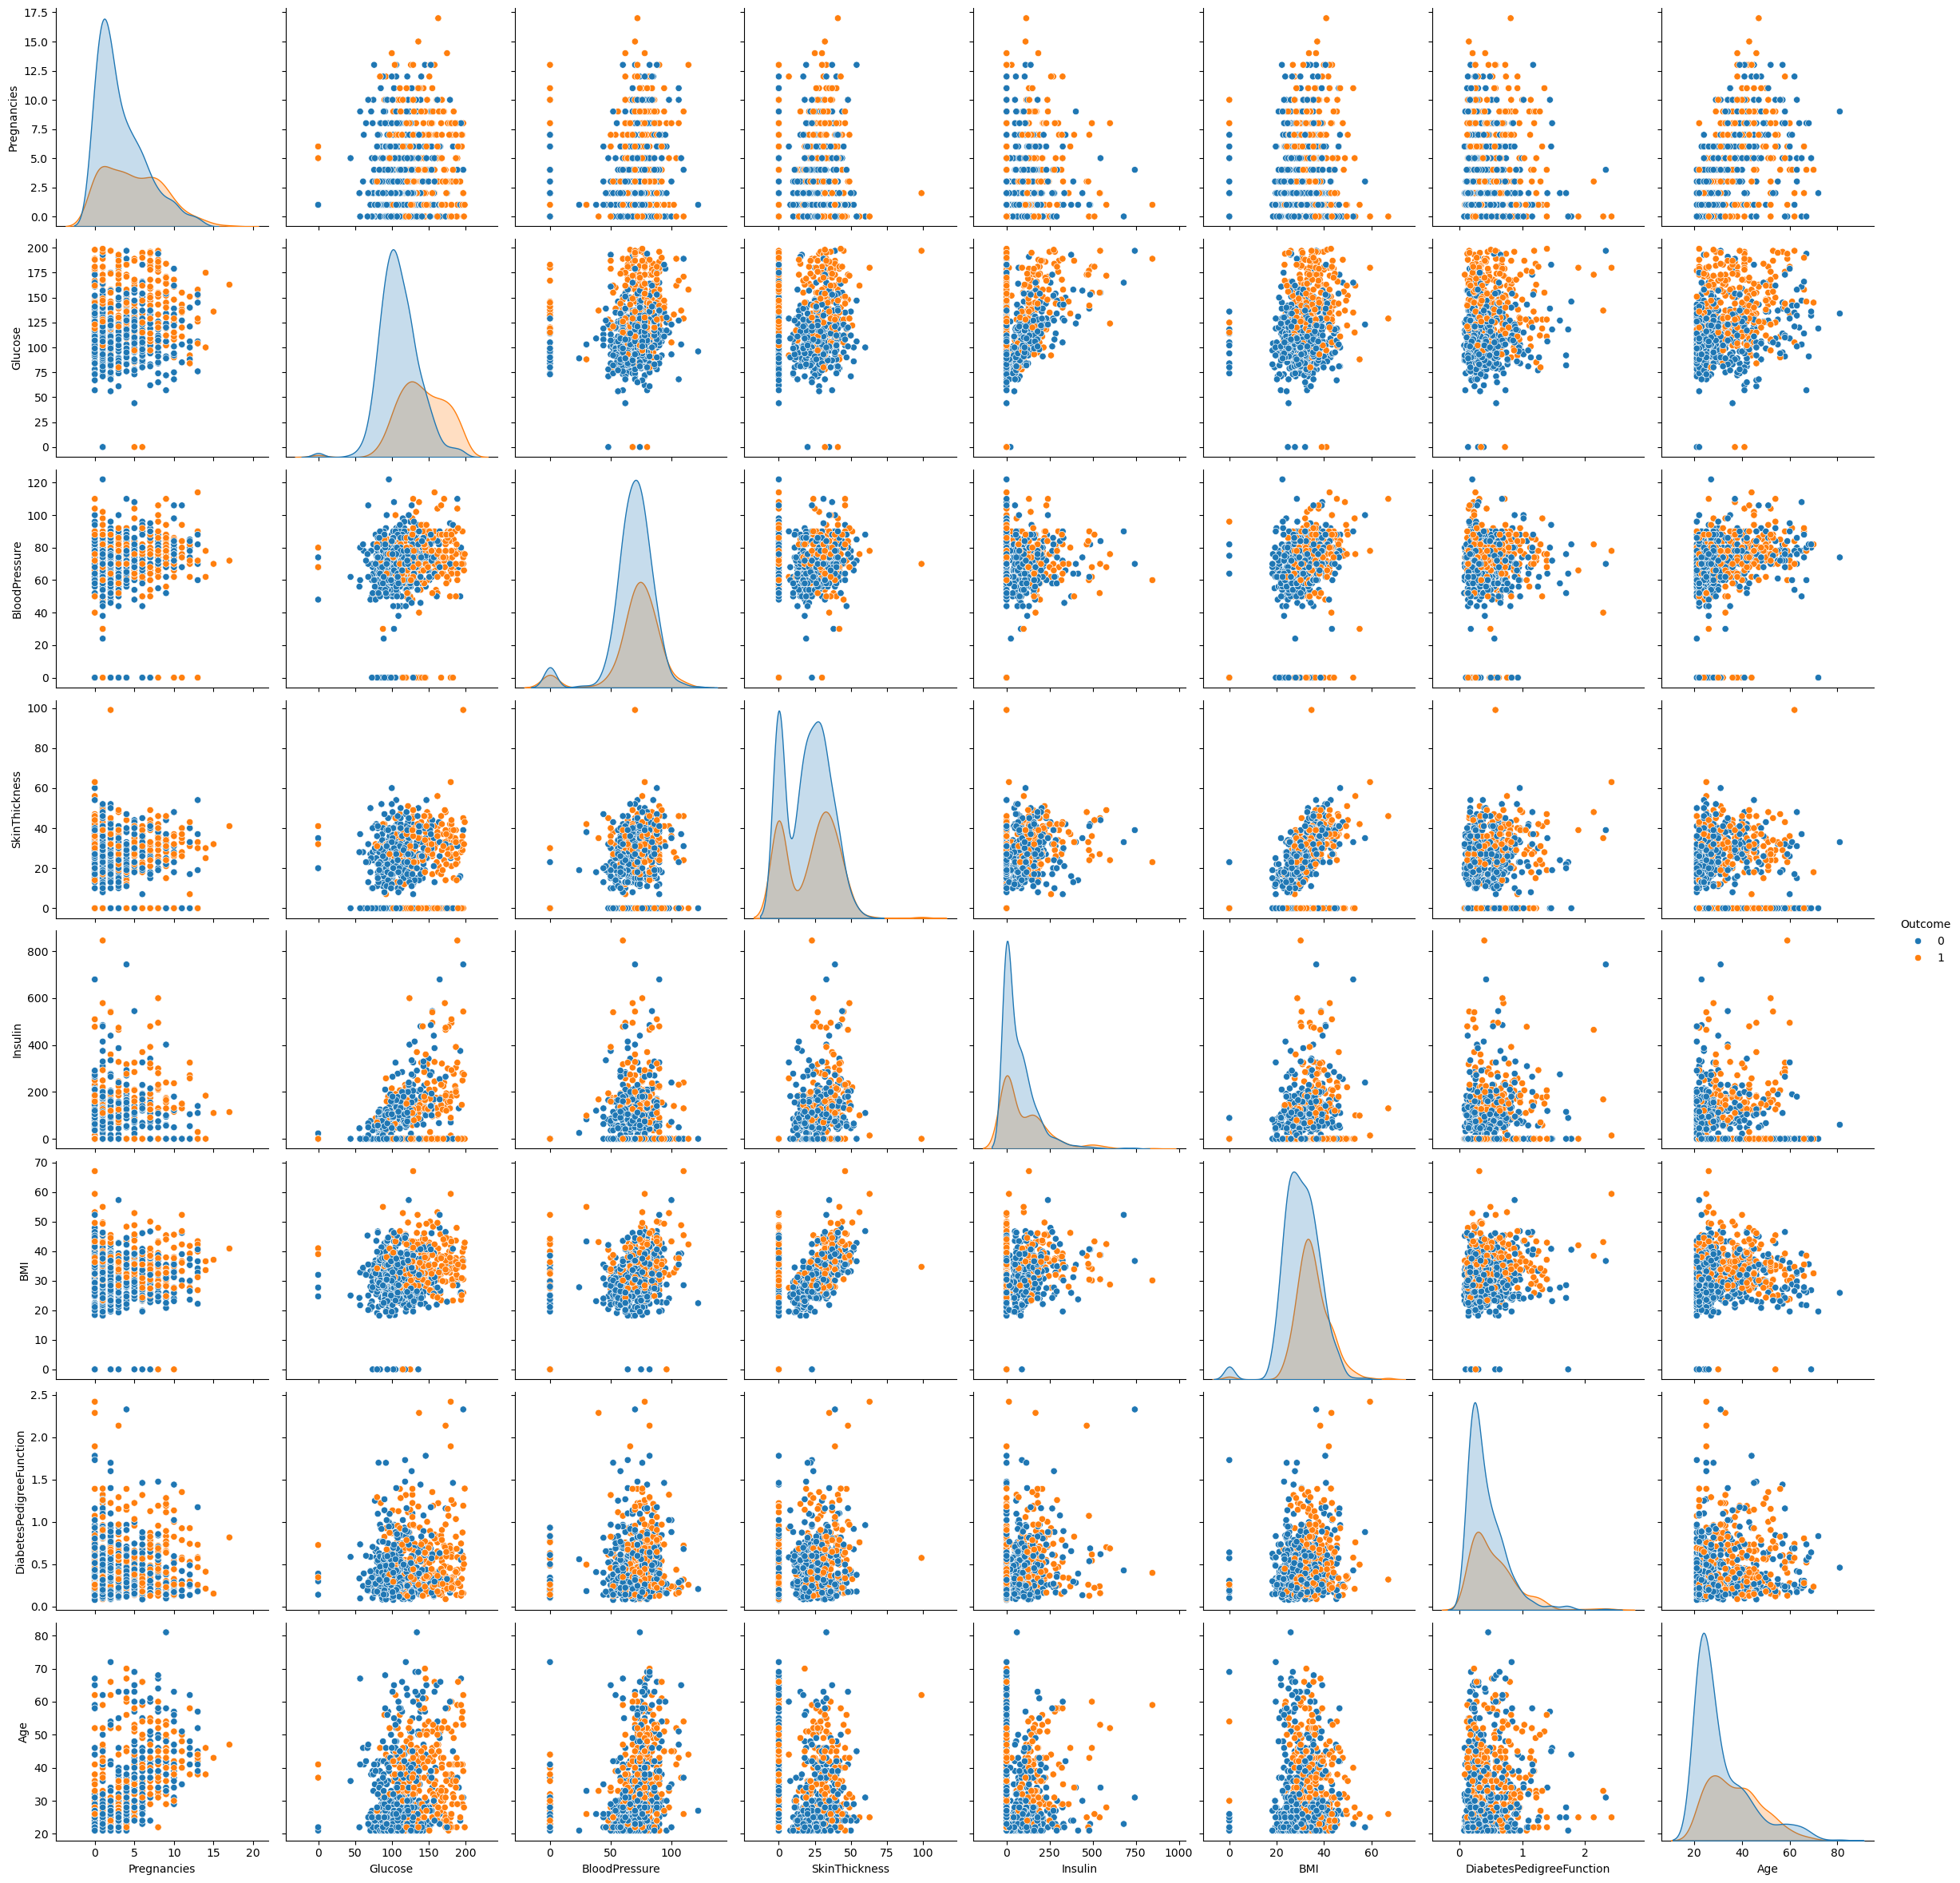

In [9]:
sns.pairplot(pima, hue="Outcome", height=3);
plt.show()

In [10]:
diabetes = pima['Outcome']
predictors = pima['Glucose']

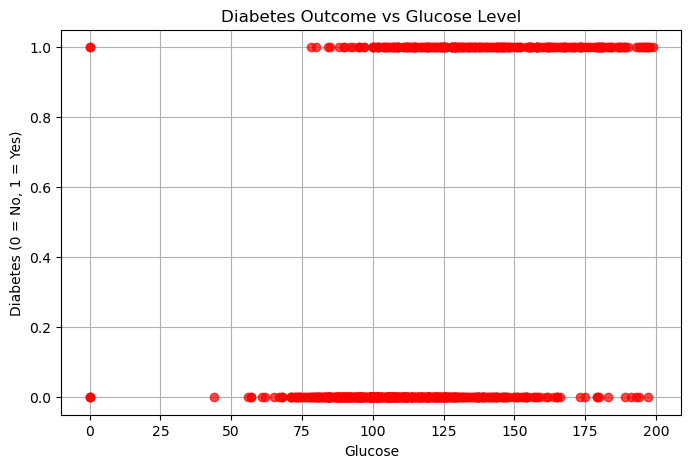

In [11]:
plt.figure(figsize=(8,5))
plt.plot(predictors, diabetes,'ro', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.title('Diabetes Outcome vs Glucose Level')
plt.grid(True)

* First step is always to set aside some data for testing after we train the model. 

In [12]:
predictors_train, predictors_test, diabetes_train, diabetes_test = train_test_split(predictors, diabetes, test_size=0.25, random_state=16)

* Lets examine how the test and training data are distributed.  

In [13]:
print(np.sum(diabetes_train == 1), np.sum(diabetes_train == 0))
print(np.sum(diabetes_test== 1), np.sum(diabetes_test == 0))

201 375
67 125


In [14]:
# I need to do a reshape here because I have a single predictor.
predictors_train.values.reshape(-1,1)
# this forces it to be a 2D array with one column and many rows.

array([[142],
       [ 99],
       [125],
       [195],
       [122],
       [125],
       [137],
       [184],
       [107],
       [115],
       [ 68],
       [119],
       [130],
       [119],
       [112],
       [144],
       [154],
       [116],
       [137],
       [168],
       [ 84],
       [ 72],
       [123],
       [145],
       [165],
       [157],
       [148],
       [127],
       [131],
       [137],
       [107],
       [100],
       [139],
       [115],
       [ 89],
       [113],
       [126],
       [147],
       [111],
       [103],
       [166],
       [106],
       [148],
       [121],
       [ 91],
       [ 85],
       [125],
       [128],
       [ 90],
       [116],
       [120],
       [176],
       [126],
       [137],
       [107],
       [ 73],
       [ 77],
       [ 74],
       [ 81],
       [100],
       [116],
       [109],
       [ 88],
       [133],
       [126],
       [ 79],
       [120],
       [ 93],
       [ 92],
       [146],
       [182],
      

* our syntax is sklearn is standard 

* first lets fit the model

In [15]:
lr = LogisticRegression()
lr.fit(predictors_train.values.reshape(-1,1), diabetes_train)


LogisticRegression()

* Now lets evaluate the model performance.  the `score` method returns accuracy for Logistic Regression 

In [16]:
accuracy_train = lr.score(predictors_train.values.reshape(-1,1), diabetes_train)
accuracy_test = lr.score(predictors_test.values.reshape(-1,1), diabetes_test)
print(f"Training Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")    

Training Accuracy: 0.743
Test Accuracy: 0.760


* Is that good?
* Is there anything unusual?   

*Whats the model it generated?

In [17]:
beta = list()
beta.append(lr.intercept_[0])
beta.append(lr.coef_[0][0])
print(f"beta0 (intercept): {beta[0]:.3f}")
print(f"beta1 (slope): {beta[1]:.3f}")

beta0 (intercept): -4.920
beta1 (slope): 0.035


In [18]:
decision_boundary = -beta[0] / beta[1]
print(f"Decision Boundary (Glucose level where P(Y=1|x)=0.5): {decision_boundary:.3f}")

Decision Boundary (Glucose level where P(Y=1|x)=0.5): 142.577


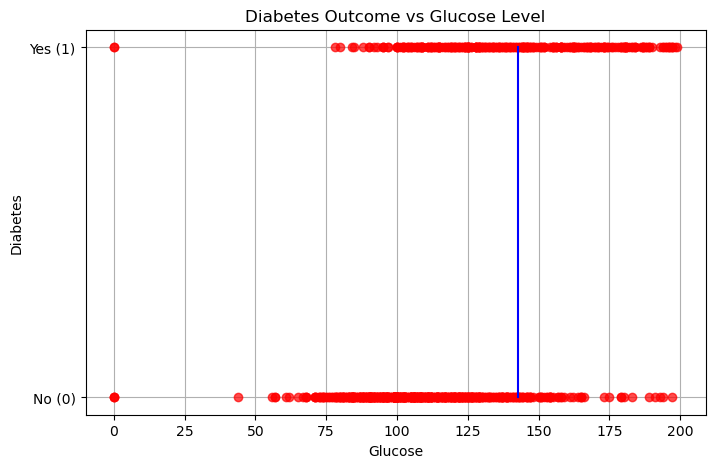

In [19]:
plt.figure(figsize=(8,5))
plt.plot(predictors, diabetes,'ro', alpha=0.7, label = 'data')
plt.plot([decision_boundary,decision_boundary],[0,1],'b-',label = 'decision')
plt.xlabel('Glucose')
plt.ylabel('Diabetes')
plt.yticks([0,1],labels = ['No (0)','Yes (1)'])
plt.title('Diabetes Outcome vs Glucose Level')
plt.grid(True)

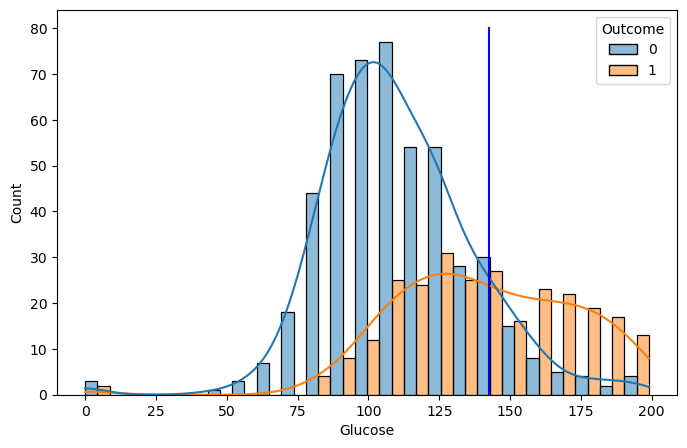

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(pima, x='Glucose',hue='Outcome',multiple='dodge',
             kde=True)
plt.plot([decision_boundary,decision_boundary],[0,80],'b-',label = 'decision')

### Confusion Matrix 

* A Confusion Matrix provides better insight into classifier performance than simple accuracy 
* To obtain a confusion matrix we need predictions from the model

In [21]:
diabetes_train_pred = lr.predict(predictors_train.values.reshape(-1,1))
diabetes_test_pred = lr.predict(predictors_test.values.reshape(-1,1))


Compute the confusion matrix for the training data

In [22]:
cnf_matrix_train = confusion_matrix(diabetes_train, diabetes_train_pred)
print(cnf_matrix_train)

[[333  42]
 [106  95]]


([<matplotlib.axis.YTick at 0x7f793021b750>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Diabetes')])

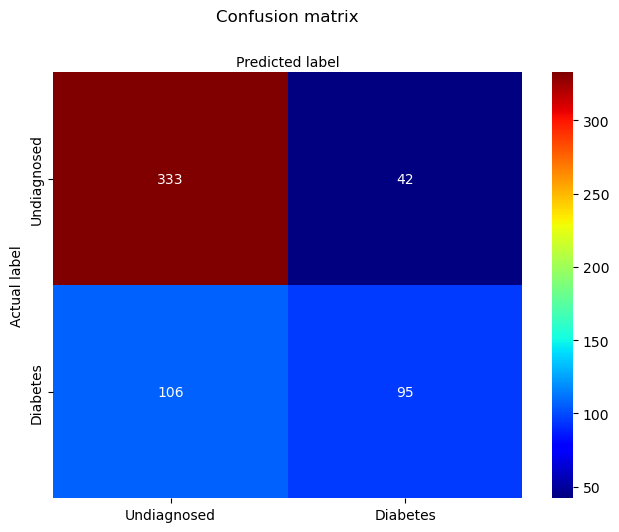

In [23]:
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)

([<matplotlib.axis.YTick at 0x7f79300ba990>,
 [Text(0, 0.5, 'Undiagnosed'), Text(0, 1.5, 'Diabetes')])

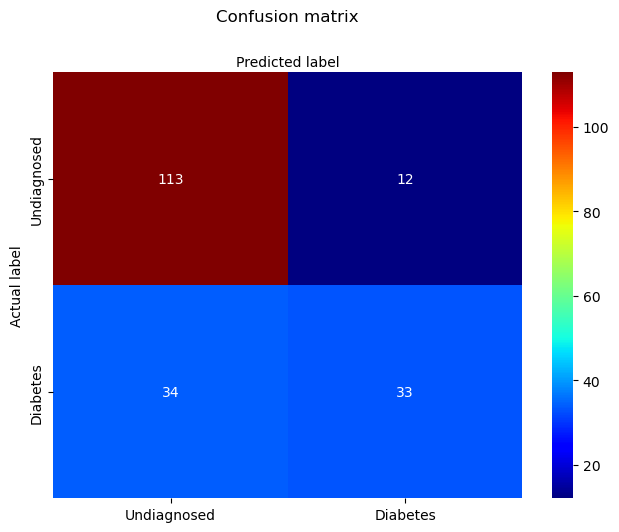

In [24]:
cnf_matrix_test = confusion_matrix(diabetes_test, diabetes_test_pred)
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)


* What if labeled them all as undiagnosed. 

In [25]:
diabetes_fake_pred = np.zeros_like(diabetes_test_pred)

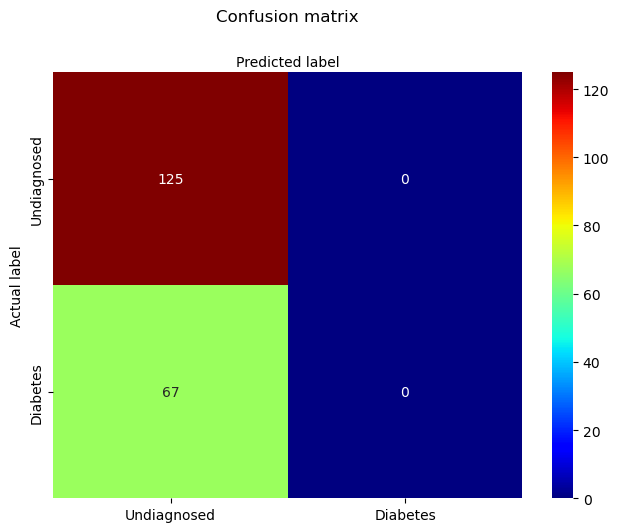

In [26]:
cnf_matrix_test = confusion_matrix(diabetes_test, diabetes_fake_pred)
#Never say '"Healthy", "Normal", just say "Undiagnosed"
class_names=['Undiagnosed','Diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_test), annot=True, cmap="jet" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.xticks(tick_marks+0.5, class_names)
plt.yticks(tick_marks+0.5, class_names)
plt.show()

In [27]:
accuracy_fake = np.sum(diabetes_fake_pred == diabetes_test)/np.size(diabetes_test)
print(f"If I always guess 0: {accuracy_fake:.3f}")

If I always guess 0: 0.651


### Classification Report 

* A classification report provides a more nuanced look at how the classifier is performing.  

* Its grounded in Signal Detection Theory which we also use in Psychology for Perception and Memory research. 

* We are going to label the class that is 1 in your logistic regression model as the **positive** class.  

* We are going to label the class that is 0 in your logistic regression model as the **negative** class

* TP = True Positive (positive class labeled as positive)
* FP = False Positive (negative class labeled as positive)
* TN - True Negative  (negative class labeled as negative)
* FN - False Negative (negative class labeled as positive)

The sklearn function `classification_report` provides a lot of information. 

In [28]:
#Here i get the classification report on the test data 
class_names=['Undiagnosed','Diabetes'] # name  of classes
print(classification_report(diabetes_test,diabetes_test_pred,target_names=class_names))

              precision    recall  f1-score   support

 Undiagnosed       0.77      0.90      0.83       125
    Diabetes       0.73      0.49      0.59        67

    accuracy                           0.76       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.76      0.76      0.75       192



### Precision  

* What proportion of positive identifications were actually correct

$$ \text{Precision} = \frac{TP}{TP+FP} $$

* What proportion of negative identifications are correct

$$ \text{Precision} = \frac{TN}{TN+FN} $$

### Recall 

* What proportion of items identified as positive are identified correctly? 

$$ \text{Recall} = \frac{TP}{TP+FN}$$

* What proportion of items identified as negative are identified incorrectly?

$$ \text{Recall} = \frac{TN}{TN+FN} $$

### F1-score

$$ F_1 = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}  $$


* $F_1$ - harmonic mean of precision and recall — high only when both are high.

* In imbalanced datasets, accuracy can be misleading (e.g., always predicting “negative” could yield high accuracy).

* $F_1$ score penalizes such behavior because it rewards models that do well on both identifying positives and avoiding false alarms.


### Prediction Probabilities 

* The strength of linear methods like logistic regression is that they can provide rich insight into the performance of the model.

* As we define a probability model, we can estimate the probability that each item belongs to the positive (1) class.

* The prediction probability is a confidence estimate on the prediction.  



<p align="center">
  <img src="PrecisionVsRecallBase.png" alt="alt text" width="50%">
</p>


In [29]:
#instead of returining the class identification, return the probability its in class 1. 
diabetes_pprob = lr.predict_proba(predictors_test.values.reshape(-1,1))
#I only need to do the reshape because i have only one predictor

* Note, the output of prediction probability will have one column for every class you are trying to predict. 
* Column 0 is the probability the data is of class 0 
* Column 1 is the probability the data is of class 1 
* if you have more classes you will have more columns

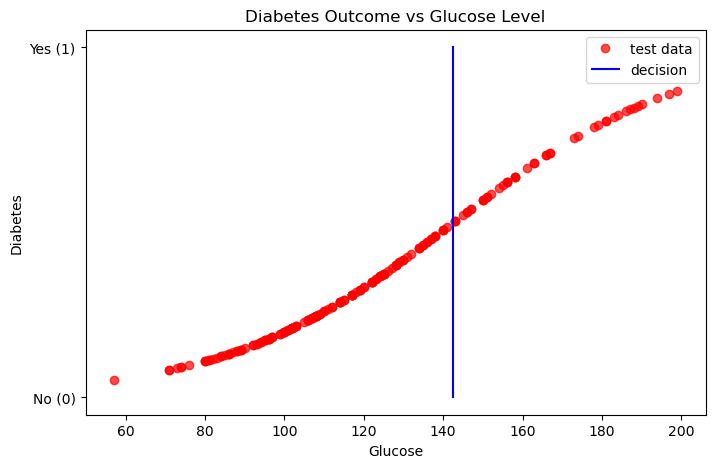

In [30]:
plt.figure(figsize=(8,5))
plt.plot(predictors_test, diabetes_pprob[:,1],'ro', alpha=0.7, label = 'test data')
plt.plot([decision_boundary,decision_boundary],[0,1],'b-',label = 'decision')
plt.xlabel('Glucose')
plt.ylabel('Diabetes')
plt.yticks([0,1],labels = ['No (0)','Yes (1)'])
plt.title('Diabetes Outcome vs Glucose Level')
plt.legend()
plt.show()

### ROC Curve 
* Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

* An ROC curve (receiver operating characteristic is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

    * True Positive Rate
    * False Positive Rate

* True Positive Rate (TPR) is the same as Recall in the classification_report and is therefore defined as follows:

$$TPR = \frac{TP}{TP+FN}$$

* False Positive Rate (FPR) is defined as follows:

$$FPR = \frac{FP}{FP+TN}$$

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold always classifies more items as positive, thus increasing both False Positives and True Positives

In [31]:
# roc_curve returns fpr and tpr values for different values of the threshold 
fpr, tpr, _ = roc_curve(diabetes_test,  diabetes_pprob[:,1])
# roc_auc_curve measures the area under the curve
auc = roc_auc_score(diabetes_test, diabetes_pprob[:,1])

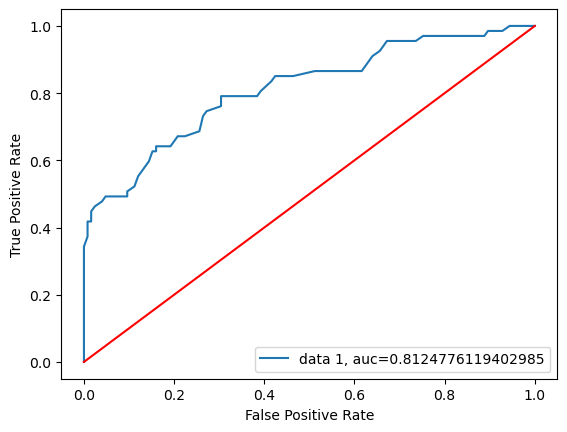

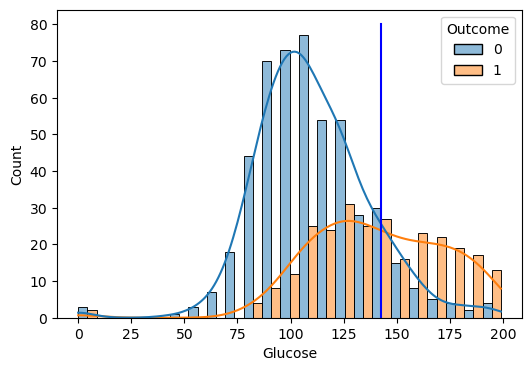

In [32]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r-')
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()
plt.figure(figsize=(6,4))
sns.histplot(pima, x='Glucose',hue='Outcome',multiple='dodge',
             kde=True)
plt.plot([decision_boundary,decision_boundary],[0,80],'b-',label = 'decision')
plt.show()